In [ ]:
"""

Created on Wed Jan 22 16:41 2025

Prepare initial conditions for ice-shelf cavities

Author: C. Burgard

"""

In [46]:
import xarray as xr
import numpy as np
from tqdm.notebook import tqdm

FUNCTIONS

In [2]:
def weighted_mean(data, dims, weights):
    weight_sum = weights.sum(dim=dims) # to avoid dividing by zero
    return (data*weights).sum(dim=dims)/weight_sum.where(weight_sum != 0)

READ IN DATA

In [3]:
inputpath_raw = '/data/cburgard/PREPARE_FORCING/PREPARE_PRESCRIBED_MELT/raw/'
inputpath_raw2 = '/data/cburgard/PREPARE_FORCING/PREPARE_CAVITY_MASKS/raw/'
inputpath_interim = '/data/cburgard/PREPARE_FORCING/PREPARE_PRESCRIBED_MELT/interim/'
inputpath_interim2 = '/data/cburgard/PREPARE_FORCING/PREPARE_CAVITY_MASKS/interim/'

In [35]:
#T_init_0 = xr.open_dataset(inputpath_raw + 'conservative_temperature_WOA13_decav_Reg1L75_clim.nc')
#S_init_0 = xr.open_dataset(inputpath_raw + 'absolute_salinity_WOA13_decav_Reg1L75_clim.nc')
T_init_0 = xr.open_dataset(inputpath_raw + 'eORCA1.4.2_conservative_temperature_WOCE.nc')
S_init_0 = xr.open_dataset(inputpath_raw + 'eORCA1.4.2_absolute_salinity_WOCE.nc')

In [36]:
ds_isfNEMO= xr.open_dataset(inputpath_interim + 'masks_for_eORCA1_prescribedmeltinopencav.nc')
domain_cfg = xr.open_dataset(inputpath_raw2 + 'eORCA1.4.3_OpenSeas_OpenAllCav_ModStraights/eORCA1.4.3_OpenSeas_OpenAllCav_ModStraights_domain_cfg.nc')

In [37]:
mask_fronts = xr.open_dataset(inputpath_interim2 + 'mask_fronts_eORCA1.nc')

In [38]:
file_Justine = xr.open_dataset(inputpath_interim2 + 'Mask_Iceshelf_IMBIE2_v2_with_zmin_zmax_isfconc.nc').drop('quantile')


In [21]:
file_Justine['NAME'].sel(ID=128).load()

<xarray.DataArray 'NAME' ()>
array('Riiser-Larsen', dtype='<U13')
Coordinates:
    ID       int64 128

MAKE A MEAN VERTICAL PROFILE IN FRONT OF THE ICE SHELF

In [39]:
cell_area = domain_cfg['e1t'] * domain_cfg['e2t']

In [40]:
ID_open_list = [21,66,117,124,127,128] #,67,125

In [30]:
T_init_0['votemper']

<xarray.DataArray 'votemper' (time_counter: 12, z: 75, y: 180, x: 360)>
[58320000 values with dtype=float32]
Coordinates:
  * time_counter  (time_counter) float32 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0 12.0
Dimensions without coordinates: z, y, x
Attributes:
    long_name:  sea_water_conservative_temperature
    units:      degC

In [45]:
for ID in tqdm(ID_open_list):
    if ID == 66:
        front_mask_kisf = (mask_fronts['mask_front'] == 66) | (mask_fronts['mask_front'] == 67)
    elif ID == 124:
        front_mask_kisf = (mask_fronts['mask_front'] == 124) | (mask_fronts['mask_front'] == 125)
    else:
        front_mask_kisf = mask_fronts['mask_front'] == ID
    T_mean = weighted_mean(T_init_0['temp'].where(front_mask_kisf), ['x','y'], cell_area.where(front_mask_kisf))
    S_mean = weighted_mean(S_init_0['salt'].where(front_mask_kisf), ['x','y'], cell_area.where(front_mask_kisf))

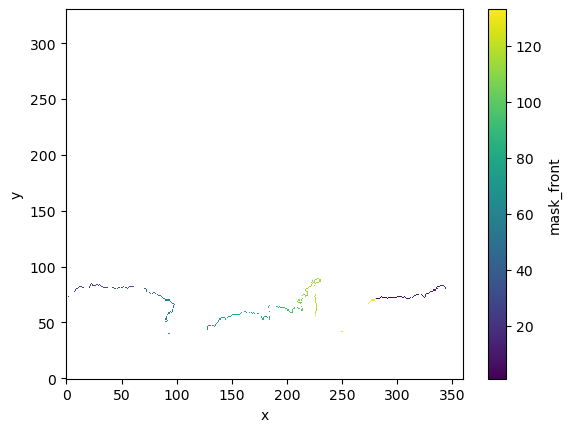

In [56]:
mask_fronts['mask_front'] == 66)

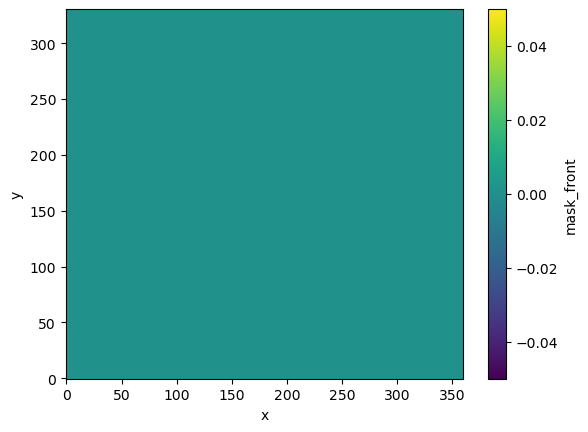

In [54]:
front_mask_kisf.plot()

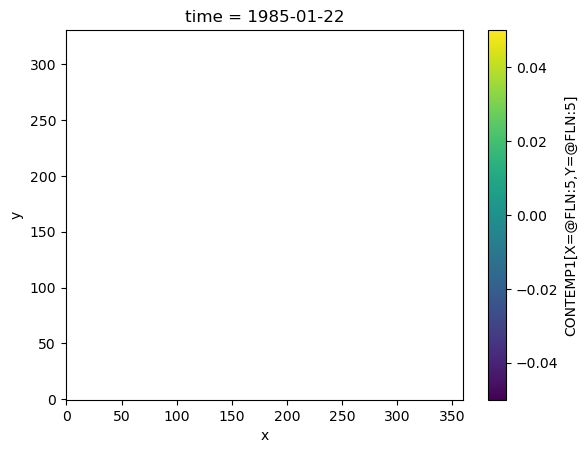

In [52]:
T_init_0['temp'].where(front_mask_kisf).isel(time=0,z=0).plot()

In [22]:
S_init_0

<xarray.Dataset>
Dimensions:       (time_counter: 12, z: 75, y: 180, x: 360)
Coordinates:
  * time_counter  (time_counter) float32 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0 12.0
Dimensions without coordinates: z, y, x
Data variables:
    vosaline      (time_counter, z, y, x) float32 ...
    lon           (x) float32 ...
    lat           (y) float32 ...
    nav_lev       (z) float32 ...
Attributes:
    creation_date:  Wed Jun 10 10:34:45 CEST 2015
    script_name:    /home/globc/sanchez/WORK/TEOS10/5_compute_teos10.ncl

In [ ]:
weighted_mean(['x','y'])

In [ ]:
T_init_0['votemper']